In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1: (5 points) Read dictionary.csv file (this file is in the Files section of your class portal) as a Pandas DataFrame and perform the following:

In [24]:
dictionary = pd.read_csv('class3/dictionary.csv')

## a) Print the column names.

In [25]:
print(dictionary.columns)

Index(['Country', 'Code', 'Population', 'GDP per Capita'], dtype='object')


## b) Print the shape.

In [26]:
print(dictionary.shape)

(201, 4)


## c) Check if there any missing values or not a number in the columns. Print the missing or not a number count for each column.

In [27]:
for col in dictionary.columns:
    print(f"Column \"{col}\" in dictionary.csv has {dictionary[col].isnull().sum()} null values")

Column "Country" in dictionary.csv has 0 null values
Column "Code" in dictionary.csv has 0 null values
Column "Population" in dictionary.csv has 5 null values
Column "GDP per Capita" in dictionary.csv has 25 null values


## d) Find mean of Population and mean of GDP per Capita and print the values.

In [28]:
print(f'The mean of the "Population" in dictionary is {dictionary["Population"].mean()}')
print(f'The mean of the "GDP per Capita" in dictionary is {dictionary["GDP per Capita"].mean()}')

The mean of the "Population" in dictionary is 37228250.14285714
The mean of the "GDP per Capita" in dictionary is 12882.556130569323


## e) Propose a method to fill the missing values or not a number for each. Explain why you choose this method.

### First let's take a look at the distribution of the variables we need to fill

In [29]:
dictionary["Population"].describe()

count    1.960000e+02
mean     3.722825e+07
std      1.399655e+08
min      1.022200e+04
25%      1.638278e+06
50%      7.450124e+06
75%      2.557454e+07
max      1.371220e+09
Name: Population, dtype: float64

<Axes: >

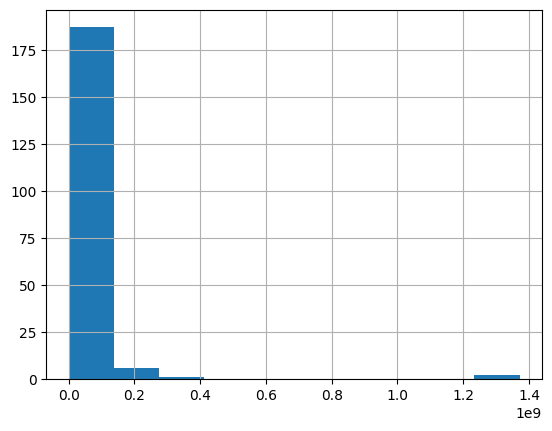

In [30]:
dictionary["Population"].hist()

<Axes: >

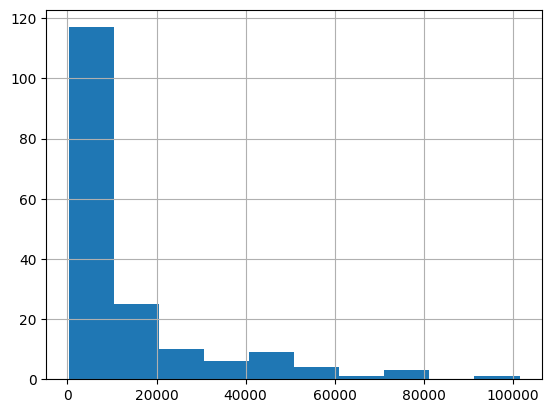

In [31]:
dictionary["GDP per Capita"].hist()

### Some potential options: 
#### 1) Ffill or Bfill 
     Pros: Easy to implement 
     Cons: Assumes that data in columns next to each other will be close, but we can't assume this based on our data (alphabetical ordering by country name likely does not correlate with population or GDP). 
#### 2) Fill in missing values with the mean, median, or mode 
     Pros: Easy to implement. Should preserve statistical properties of the data (i.e. mean will be close if not the same) 
     Cons: Is still a guess. Does not take into account potential relationships between variables. 
#### 3) Imputation
 
 ## Let's go with option 2) Fill NA with mean (Reasons being that it's easy to implement and preserves statistical properties of data)

### Let's see how the stats change when doing the fill

In [32]:
print(dictionary['Population'].describe())
dictionary['Population'].fillna(value=dictionary['Population'].mean(), inplace=True)
print(dictionary['Population'].describe())

count    1.960000e+02
mean     3.722825e+07
std      1.399655e+08
min      1.022200e+04
25%      1.638278e+06
50%      7.450124e+06
75%      2.557454e+07
max      1.371220e+09
Name: Population, dtype: float64
count    2.010000e+02
mean     3.722825e+07
std      1.382049e+08
min      1.022200e+04
25%      1.844325e+06
50%      8.075060e+06
75%      2.851370e+07
max      1.371220e+09
Name: Population, dtype: float64


In [33]:
print(dictionary['GDP per Capita'].describe())
dictionary['GDP per Capita'].fillna(value=dictionary['GDP per Capita'].mean(), inplace=True)
print(dictionary['GDP per Capita'].describe())

count       176.000000
mean      12882.556131
std       17747.141203
min         277.068309
25%        1781.096847
50%        5233.583395
75%       15494.683646
max      101449.968168
Name: GDP per Capita, dtype: float64
count       201.000000
mean      12882.556131
std       16600.930494
min         277.068309
25%        2111.138024
50%        6993.477360
75%       13498.661406
max      101449.968168
Name: GDP per Capita, dtype: float64


# Question 2 (5 points): Use Car_Purchasing_Data.csv file, this file is in the Linear Regression folder. 

In [34]:
car_purchase_data = pd.read_csv('class2/LinearReg/Car_Purchasing_Data.csv')

In [35]:
car_purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


## In the auto example, find the multi-linear relationship between 'Age','Annual Salary', 'Net Worth' with 'Car Purchase Amount'. 

In [36]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
# Create an instance of LinearRegression class
reg = linear_model.LinearRegression()

In [38]:
# Create an instance of Standard Scaler
a_scaler = StandardScaler() 

In [39]:
independent_vars = a_scaler.fit_transform(car_purchase_data[['Age', 'Annual Salary', 'Net Worth']])

In [40]:
# Split into train and test
x_train, x_test, y_train, y_test = \
train_test_split(independent_vars, 
                 car_purchase_data["Car Purchase Amount"], 
                 test_size=0.2, 
                 random_state=4)

In [41]:
# Fit the data
reg.fit(x_train, y_train)

LinearRegression()

In [42]:
print(reg.coef_)
print(reg.intercept_)

[6698.99994256 6569.701515   5019.75983599]
44203.833191718


## Car Purchase Amount = Scaler Age\*6699.0 + Scaler Annual Salary\*6569.7 + Scaler Net Worth\*5019.8 + 44203.8

## Find the mean squared error and r-squared for test and train set

In [43]:
# MSE test
# yhat is the predicted value of y using the x_test data with the linear regression model
yhat = reg.predict(x_test) 
mse_test = mean_squared_error(y_test, yhat)
print(f"MSE test: {mse_test}")

# MSE train
# the predicted y values for the x_train data plugged into the regression model
y_train_predict = reg.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_predict)
print(f"MSE train: {mse_train}")

# R2 test
print("r-squared for the test data: ", r2_score(y_test, yhat))

# R2 train
print("r-squared for the train data: ", r2_score(y_train, y_train_predict))

MSE test: 60987.69459101417
MSE train: 57696.85385835456
r-squared for the test data:  0.9994323113012908
r-squared for the train data:  0.9995037057564383


## Make a conclusion

## MSE
### MSE for test is 60,987.7 which is higher than the MSE for train at 57,696.9
### This suggests that the model might be overfitted

### Next steps: We could consider changing feature selection (adding or removing independent variables from the linear regression)
### Or we could try using regularization (LASSO, Ridge, or Elastic)

## R-squared
### R-squared for test is 0.9994 while R-squared for train is 0.9995
### These are both high and close to each other in value, which suggests the model is not overfit and performs well on new data

## Conclusion - Using Age, Annual Salary, and Net worth as independent variables in a multilinear regression do a good job predicting Car Purchase Amount
### Regularization or feature selection can be explored to further improve this model if needed

In [44]:
# Since MSE has no upper bound, we compute the ratio between 
# mse_test and mse_train or difference to see if 
# ratio is close to one and difference is less than 5%

r1 = mse_test/mse_train
diff1 = np.abs((mse_train - mse_test) / mse_train)

print(r1)
print(diff1)

1.057036744858543
0.057036744858543036
